# PHIGHT COVID Capstone - Appendix

Developed by Wei-Yu Tseng

March, 2022

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, center_of_mass
import matplotlib.dates as mdates
sns.set_style("whitegrid")
# Set the style of graphs. 

### Data Cleaning

In [2]:
covid = pd.read_csv('/Users/weiyut/Downloads/deaths_teaching_mobility.csv')
# Load case/deaths Data.

covid = covid.rename(columns = {'date':'DATE', 'rev_newdeaths':'NEWDEATHS', 'rev_newconfirmed2': 'NEWCONFIRMED'})
# Rename columns we will be using. 
  
covid.DATE = pd.to_datetime(covid.DATE)
# Convert the Date columns to pandas datetime data type.

,Unnamed: 0,county,fips,DATE,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,...,major_teaching,death_prop,death_per_1000,part_work_prop_7d,part_work_sample_size,full_work_prop_7d,full_work_sample_size,full_work_std,res_visit_by_pop,bar_visit_by_pop
0,1,ADAMS,39001,2020-01-22,38.845411,-83.471896,27960,0,0,0,...,Hybrid,0.0,0.0,0.092631,154,0.077861,154,0.004488,203.568392,NaN
1,2,ALLEN,39003,2020-01-22,40.772852,-84.108023,106160,0,0,0,...,Hybrid,0.0,0.0,0.100632,641,0.073459,641,0.002243,457.810983,NaN
2,3,ASHLAND,39005,2020-01-22,40.847723,-82.272808,53973,0,0,0,...,Hybrid,0.0,0.0,0.109876,308,0.081989,308,0.003439,249.115243,NaN
3,4,ASHTABULA,39007,2020-01-22,41.708603,-80.748302,98637,0,0,0,...,Hybrid,0.0,0.0,0.089040,651,0.072514,651,0.002175,120.561072,NaN
4,5,ATHENS,39009,2020-01-22,39.334256,-82.042786,67121,0,0,0,...,Hybrid,0.0,0.0,0.101534,336,0.066396,336,0.002957,441.578061,NaN


### Deaths vs Cases 

#### Optimal shifting function 

In [8]:
sq_error = []
# Create an empty list to store squared errors.

for i in range(1,22): # Test the shifting from day 1 to day 21.
    
    j = 50 # Upscale deaths 50 times (since death rate is about 2%).
    
    sq_error.append((df_1.NEWCONFIRMED[:-i] - df_1.NEWDEATHS.shift(-i).fillna(0)[:-i]*j).astype(float).apply(lambda x: x**2).mean())
    # Calculate the mean sqaured difference between cases and upscaling deaths, and store the value to the list we just created. 
    
    

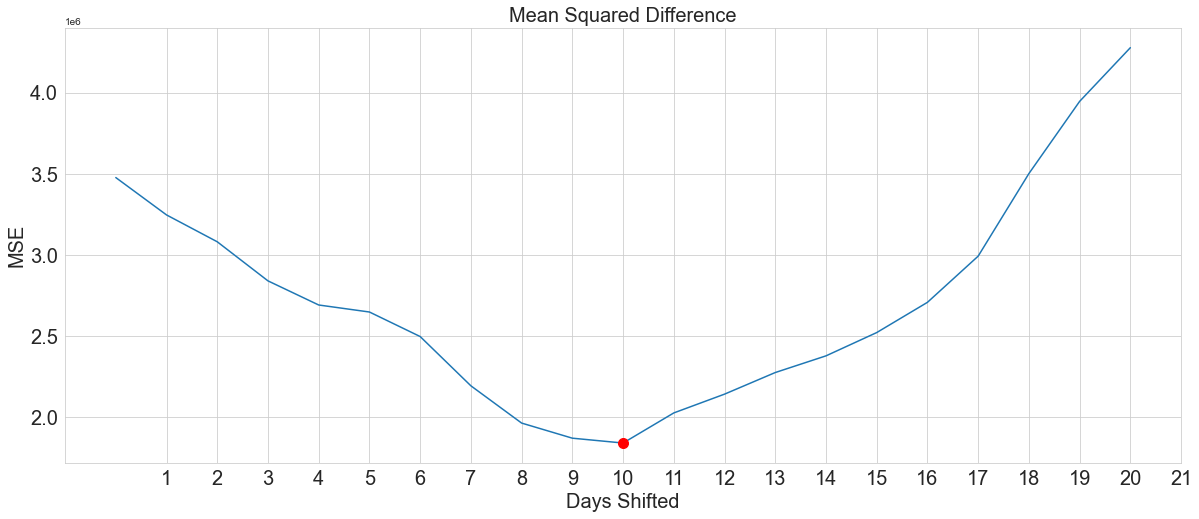

In [9]:
plt.figure(figsize=(20,8))
# Set the figure size.

plt.plot(list(range(0,21)),sq_error)
# main function, plot the calculated sqaured differences against the shift. 

plt.title('Mean Squared Difference',fontsize = 20)
# Customize the main title.

plt.xlabel('Days Shifted',fontsize = 20)
# Customize the y-axis label.

plt.ylabel('MSE', fontsize = 20)
# Customize the x-axis label.

plt.xticks(list(range(1,22)), fontsize = 20)
# Customize the x-axis value. 

plt.yticks(fontsize = 20)
# Customize the y-axis value. 

plt.plot(10, min(sq_error), marker = "o", color = 'red', markersize = '10')
# Plot the lowest value in the squared error list.

plt.show()
# Show the plot.

### Death Rate by Teaching Posture

#### Hybrid Data

In [60]:
hybrid_dr = covid.query("major_teaching == 'Hybrid'").groupby('DATE')[['NEWDEATHS','NEWCONFIRMED']].sum()
# Filter the original data frame to Hybrid teaching posture only, and aggregate deaths and cases on the same date aacross all counties.

hybrid_dr['Deaths_shift'] = hybrid_dr.NEWDEATHS.shift(-14)
# Create a new column for shifting deaths cases.

hybrid_dr['Death_Rate'] = hybrid_dr['Deaths_shift']/hybrid_dr['NEWCONFIRMED']
# Calculate the shifting Death Rate.


#### In-person Data

In [61]:
Inp_dr = covid.query("major_teaching == 'On Premises'").groupby('DATE')[['NEWDEATHS','NEWCONFIRMED']].sum()
# Filter the original data frame to On Premises posture only, and aggregate deaths and cases on the same date aacross all counties.

Inp_dr['Deaths_shift'] = Inp_dr.NEWDEATHS.shift(-14)
# Create a new column for shifting deaths cases.

Inp_dr['Death_Rate'] = Inp_dr['Deaths_shift']/Inp_dr['NEWCONFIRMED']
# Calculate the shifting Death Rate.

#### Remote Data

In [62]:
Online_dr = covid.query("major_teaching == 'Online Only'").groupby('DATE')[['NEWDEATHS','NEWCONFIRMED']].sum()
# Filter the original data frame to Online Only posture only, and aggregate deaths and cases on the same date aacross all counties.

Online_dr['Deaths_shift'] = Online_dr.NEWDEATHS.shift(-14)
# Create a new column for shifting deaths cases.

Online_dr['Death_Rate'] = Online_dr['Deaths_shift']/Online_dr['NEWCONFIRMED']
# Calculate the shifting Death Rate.

### 14 Days shift

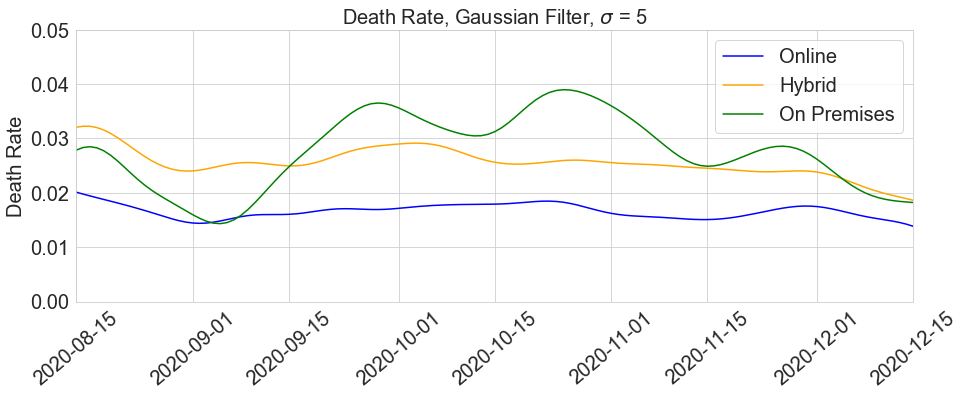

In [68]:
plt.subplots(figsize=(15,5))
# Set figure size.

sigma = 5
# Standard deviation for gaussian filter. 

plt.plot(Online_dr.index, gaussian_filter(Online_dr['Death_Rate'], sigma = sigma), c = 'blue', label = 'Online')
# Plot the filtered Online only death rate series.

plt.plot(hybrid_dr.index, gaussian_filter(hybrid_dr['Death_Rate'], sigma = sigma), c = 'orange', label = 'Hybrid')
# Plot the filtered Hybrid death rate series.

plt.plot(Inp_dr.index, gaussian_filter(Inp_dr['Death_Rate'], sigma = sigma), c = 'green', label = 'On Premises')
# Plot the filtered On Premises death rate series.

plt.yticks(fontsize = 20)
# Customize the y-axis values.

plt.xticks(fontsize = 20, rotation = 40)
# Customize the x-axis label values.

plt.ylabel('Death Rate', fontsize = 20)
# Customize the y-axis label.

plt.legend(fontsize = 20)
# Customize the legend.

plt.title('Death Rate, Gaussian Filter, '+ r'$\sigma$ = '+str(sigma), fontsize = 20)
# Customize the title.

plt.xlim([datetime.date(2020, 8, 15), datetime.date(2020, 12, 15)])
# Customize the range of date on x-axis.

plt.ylim(0,0.05)
# Customize the range of death rate on y-axis.

plt.show()
# Show the plot. 

### Population, Population Density v.s. Death Rate

### All year Data

In [69]:
all_year = covid.groupby('county')[['NEWDEATHS','NEWCONFIRMED']].sum()
# Calculate the total deaths and cases for each county.

Death_rate_by_county = all_year.NEWDEATHS/all_year.NEWCONFIRMED
# Calculate the death rate for each county.

pop = covid.groupby('county')[['population', 'population_density']].mean()
# This is actually just creating a dataframe match each county with its population and population density. (Since these data don't change in our data frame, the mean and groupby function just merge that in to one row for each county.)



### Fall Semester Data

In [70]:
covid_fall = covid.copy()
# Copy the dataframe so we won't accidentally edit the original dataframe. 

covid_fall = covid_fall[(covid_fall.DATE >= '2020-08-15') & (covid_fall.DATE <= '2020-12-15')]
# Set the timeline for the death rate to the 2020 Fall semester. 

fall = covid_fall.groupby('county')[['NEWDEATHS','NEWCONFIRMED']].sum()
# Calculate the total deaths and cases for each county.

Death_rate_by_county_fall = fall.NEWDEATHS/fall.NEWCONFIRMED
# Calculate the death rate for each county.

pop_fall = covid_fall.groupby('county')[['population', 'population_density']].mean()
# This is actually just creating a dataframe match each county with its population and population density. (Since these data don't change in our data frame, the mean and groupby function just merge that in to one row for each county.)

### Population v.s Death Rate

#### Original values

All Year

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


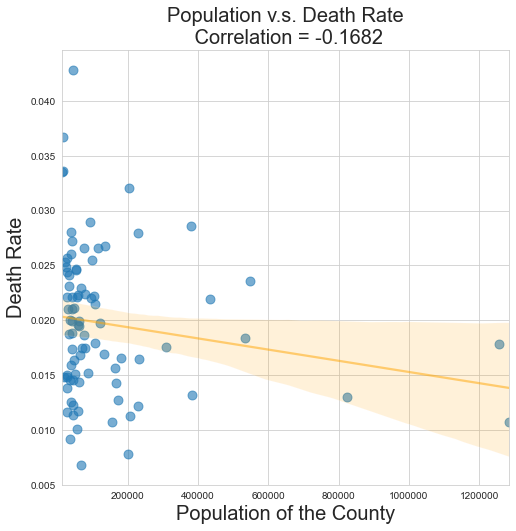

In [72]:
plt.figure(figsize = (8,8))
# Set figure size. 

sns.regplot(pop['population'], Death_rate_by_county, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
# Seaborn regression plot, include both regression line and scatters of death rate for each county.

plt.ticklabel_format(useOffset=False, style='plain')
# Options for x-axis values, so it does not display in scientific notation. 

plt.title('Population v.s. Death Rate\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county, pop['population'])[0,1],4)), fontsize = 20)
# Customization for plot title, also include the correlation value.  

plt.xlabel('Population of the County', fontsize = 20)
# Customization for x-axis label.

plt.ylabel('Death Rate', fontsize = 20)
# Customization for y-axis label.

plt.show()
# Display the plot. 


### Identical code works for rest of the plots, just different input. 


2020 Fall semester

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


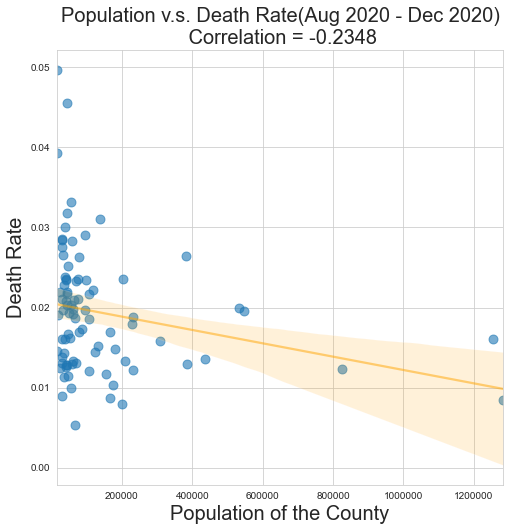

In [31]:
plt.figure(figsize = (8,8))
sns.regplot(pop_fall['population'], Death_rate_by_county_fall, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Population v.s. Death Rate(Aug 2020 - Dec 2020)\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county_fall, pop_fall['population'])[0,1],4)), fontsize = 20)
plt.xlabel('Population of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

#### Log Population

All Year

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


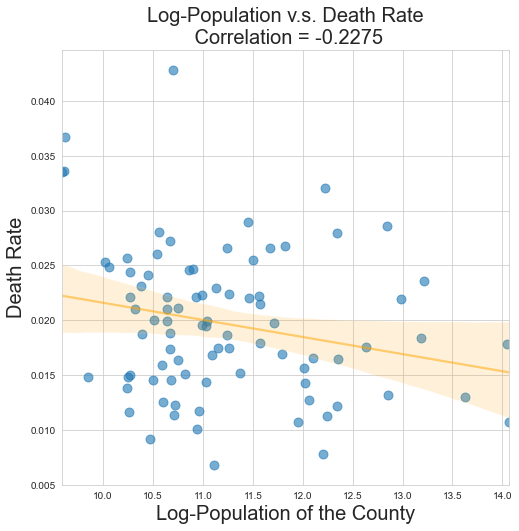

In [32]:
plt.figure(figsize = (8,8))
sns.regplot(np.log(pop['population']), Death_rate_by_county, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Log-Population v.s. Death Rate\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county, np.log(pop['population']))[0,1],4)), fontsize = 20)
plt.xlabel('Log-Population of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

2020 Fall semester

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


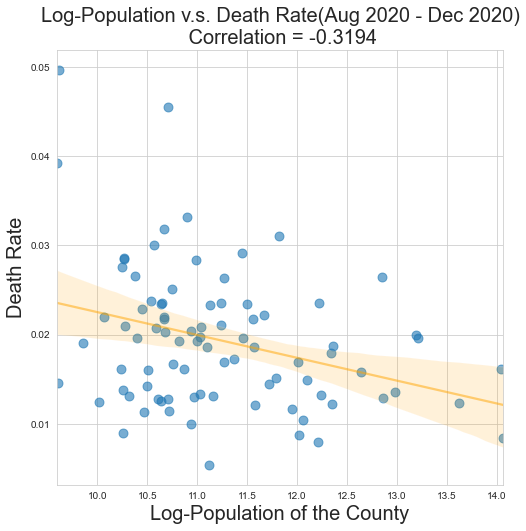

In [33]:
plt.figure(figsize = (8,8))
sns.regplot(np.log(pop_fall['population']), Death_rate_by_county_fall, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Log-Population v.s. Death Rate(Aug 2020 - Dec 2020)\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county_fall, np.log(pop_fall['population']))[0,1],4)), fontsize = 20)
plt.xlabel('Log-Population of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

### Population Density v.s Death Rate

#### Original values

All Year

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


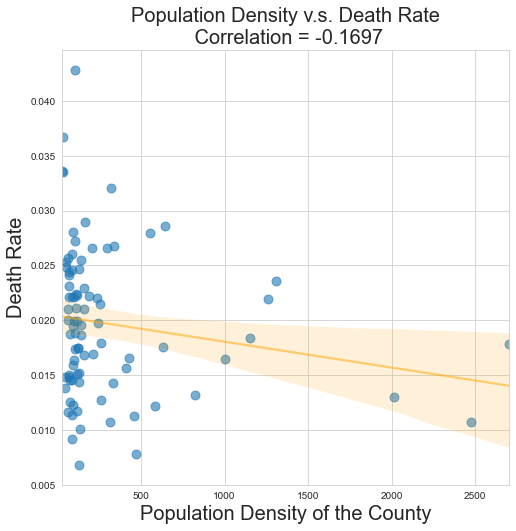

In [34]:
plt.figure(figsize = (8,8))
sns.regplot(pop['population_density'], Death_rate_by_county, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Population Density v.s. Death Rate\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county, pop['population_density'])[0,1],4)), fontsize = 20)
plt.xlabel('Population Density of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

2020 Fall semester

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


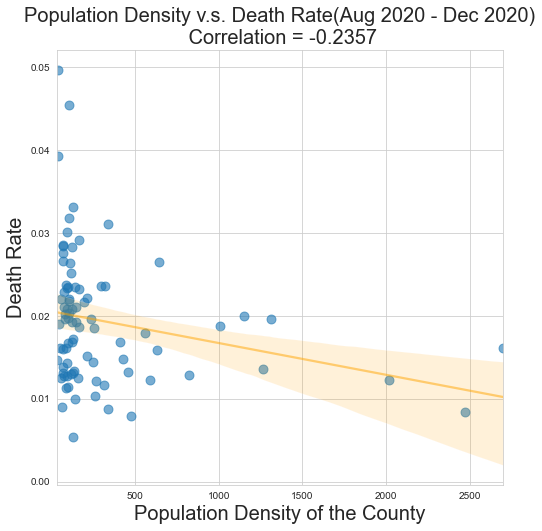

In [35]:
plt.figure(figsize = (8,8))
sns.regplot(pop_fall['population_density'], Death_rate_by_county_fall, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Population Density v.s. Death Rate(Aug 2020 - Dec 2020)\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county_fall, pop_fall['population_density'])[0,1],4)), fontsize = 20)
plt.xlabel('Population Density of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

#### Log Population

All Year

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


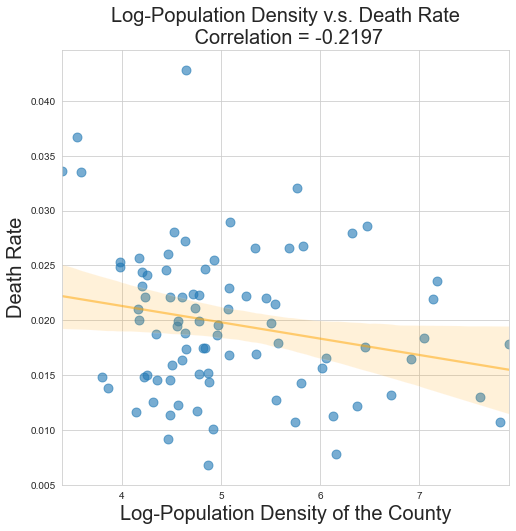

In [36]:
plt.figure(figsize = (8,8))
sns.regplot(np.log(pop['population_density']), Death_rate_by_county, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Log-Population Density v.s. Death Rate\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county, np.log(pop['population_density']))[0,1],4)), fontsize = 20)
plt.xlabel('Log-Population Density of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

2020 Fall semester

/Users/weiyut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


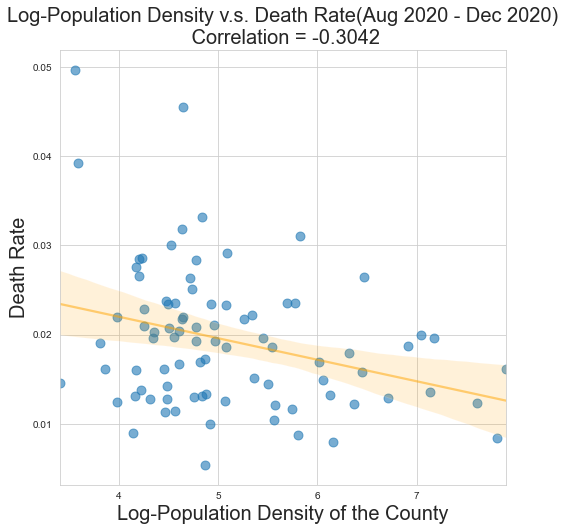

In [37]:
plt.figure(figsize = (8,8))
sns.regplot(np.log(pop_fall['population_density']), Death_rate_by_county_fall, scatter_kws={"s": 80, "alpha": 0.6},line_kws={"color": 'orange', "alpha": 0.5})
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Log-Population Density v.s. Death Rate(Aug 2020 - Dec 2020)\n Correlation = '+str(round(np.corrcoef(Death_rate_by_county_fall, np.log(pop_fall['population_density']))[0,1],4)), fontsize = 20)
plt.xlabel('Log-Population Density of the County', fontsize = 20)
plt.ylabel('Death Rate', fontsize = 20)
plt.show()

### $R_t$ Visualizations

#### Load R_t data calculated from R package

In [47]:
r_t = pd.read_csv('/Users/weiyut/Downloads/rt_plotting_df.csv')

#### $R_t$ comparison over 2 time period 

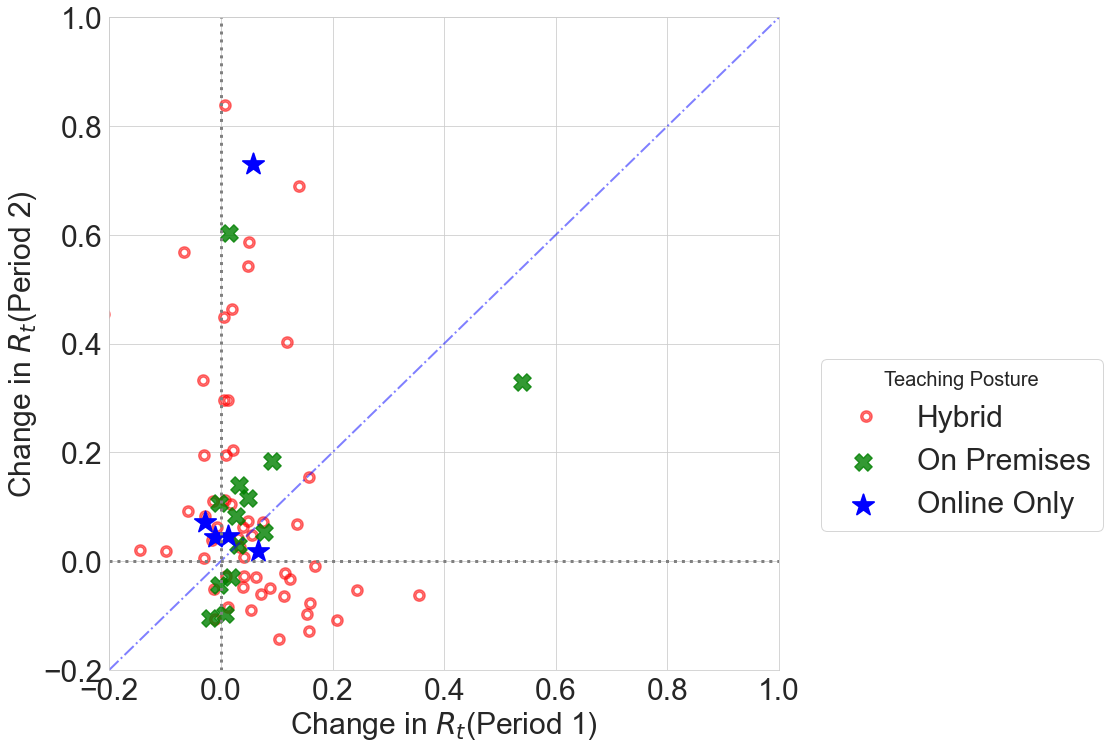

In [59]:
plt.figure(figsize = (12,12))
# Set figure size. 

sns.scatterplot(x = 'Rt_deaths_slope_first_3_weeks', 
            y = 'Rt_deaths_slope_next_3_weeks', data = r_t[r_t.major_teaching_start== 'Hybrid'], 
            color = 'red', marker="$\circ$", ec="face", s = 300, alpha = 0.5, label = 'Hybrid')
# Plot the R_t for Hybrid Counties.

sns.scatterplot(x = 'Rt_cases_slope_first_3_weeks', 
            y = 'Rt_deaths_slope_next_3_weeks', data = r_t[r_t.major_teaching_start== 'On_Premises'], 
            color = 'green', marker = 'X', ec="face", s = 300, alpha = 0.8,label = 'On Premises')
# Plot the R_t for On Premises Counties.

sns.scatterplot(x = 'Rt_deaths_slope_first_3_weeks',
            y = 'Rt_deaths_slope_next_3_weeks', data = r_t[r_t.major_teaching_start== 'Online_Only'], 
            color = 'blue' ,marker = '*', ec="face", s = 500, alpha = 1, label = 'Online Only')
# Plot the R_t for Online Only Counties.

plt.axline((0, 0), (0.5, 0.5), linewidth = 2, color='blue', linestyle = 'dashdot', alpha = 0.5)
# Add the diagonal line, so that the points on the LHS of the diagonal have increase in the slope of R_t. 

plt.xlabel(r'Change in $R_t$(Period 1)',fontsize = 30)
# Customization for x-axis label.

plt.ylabel(r'Change in $R_t$(Period 2)',fontsize = 30)
# Customization for y-axis label.

plt.xlim(-0.2, 1)
# Customization range of x-axis values.

plt.ylim(-0.2, 1)
# Customization range of y-axis values.

plt.axvline(0, linestyle = ':', color = 'gray', linewidth = 3)
# Add x = 0 refrerence line.

plt.axhline(0, linestyle = ':', color = 'gray', linewidth = 3)
# Add y = 0 refrerence line.

plt.xticks(fontsize = 30)
# Customization for x-axis values.

plt.yticks(fontsize = 30)
# Customization for y-axis values.

plt.legend(fontsize = 30, title = 'Teaching Posture', title_fontsize = 20, bbox_to_anchor=(1.04,0.5), loc="upper left")
# Customization for legend.

plt.show()
# Display the graph. 

